In [23]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
# from sklearn.cluster import KMeans
# import open3d as o3d
# import numpy as np

# # Прочитайте облака точек и метки из файлов KITTI
# calib_file = '/home/dmitriiming/ResearchProject/Open3D-ML/examples/demo_data/KITTI/training/calib/000008.txt'
# label_file = '/home/dmitriiming/ResearchProject/Open3D-ML/examples/demo_data/KITTI/training/label_2/000008.txt'
# velodyne_file = '/home/dmitriiming/ResearchProject/Open3D-ML/examples/demo_data/KITTI/training/velodyne/000008.bin'

# # Чтение облака точек из файла .bin
# velo_points = np.fromfile(velodyne_file, dtype=np.float32).reshape(-1, 4)

# # Преобразование в формат open3d.geometry.PointCloud
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(velo_points[:, :3])  # Используйте только координаты XYZ

# # Обрезка точек по оси Z
# cutting_height = -1.2  # Значение для отсечения снизу
# cut_indices = np.where(velo_points[:, 2] > cutting_height)[0]
# cut_points_np = velo_points[cut_indices]

# # Количество кластеров
# num_clusters = 50

# # Преобразование точек в numpy массив
# points_np = np.asarray(cut_points_np)

# # Инициализация центров кластеров
# # Например, выберем случайные точки в качестве начальных центров кластеров
# init_centers = points_np[np.random.choice(points_np.shape[0], num_clusters, replace=False)]

# # Кластеризация K-means
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(points_np)
# labels = kmeans.labels_

# # Присвоение цветов кластерам
# max_label = labels.max()
# colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
# pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# # Визуализация облака точек с кластеризацией K-means
# o3d.visualization.draw_geometries([pcd],
#                                   zoom=0.455,
#                                   front=[-0.4999, -0.1659, -0.8499],
#                                   lookat=[2.1813, 2.0619, 2.0999],
#                                   up=[0.1204, -0.9852, 0.1215])

# # Сохранение облака точек с обрезкой
# cut_pcd = o3d.geometry.PointCloud()
# cut_pcd.points = o3d.utility.Vector3dVector(cut_points_np[:, :3])  # Используйте только координаты XYZ
# o3d.io.write_point_cloud("/path/to/cut_point_cloud.ply", cut_pcd)


In [25]:
import open3d as o3d
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Загрузка облака точек из файла .bin
clustered_ply_file = 'D:/Cluster_proj/VIPCClustering/data/KITTI/velodyne/000006.bin'
velo_points = np.fromfile(clustered_ply_file, dtype=np.float32).reshape(-1, 4)
points_np = velo_points[:, :3]

# Масштабирование данных
scaler = StandardScaler()
scaled_points_np = scaler.fit_transform(points_np)

# Определение высоты отсечения
cutting_height = -1.2  # Значение для отсечения снизу

# Отсечение точек снизу по оси Z
cut_indices = np.where(points_np[:, 2] > cutting_height)[0]
cut_points_np = points_np[cut_indices]
cut_scaled_points_np = scaled_points_np[cut_indices]

# Определение числа ближайших соседей
n_neighbors = 1

# Поиск ближайших соседей для каждой точки
nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(cut_scaled_points_np)
distances, indices = nbrs.kneighbors(cut_scaled_points_np)

# Вычисление среднего расстояния до n_neighbors точек для каждой точки
avg_distances = np.mean(distances, axis=1)

# Определение порогового значения для удаления редких точек (можно настроить)
threshold_low = np.percentile(avg_distances, 1)

# Отфильтровать точки по пороговому значению
filtered_indices = np.where(avg_distances <= threshold_low)[0]
filtered_cut_points_np = cut_points_np[filtered_indices]

# Количество кластеров
num_clusters = 50

# Кластеризация K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(filtered_cut_points_np)
labels = kmeans.labels_

# Визуализация результатов
# Создание облака точек в формате open3d.geometry.PointCloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)  # Используйте только отфильтрованные точки

# Присвоение цветов кластерам
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Визуализация облака точек с кластеризацией K-means
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])


In [26]:
from sklearn.cluster import KMeans
import numpy as np
import open3d as o3d

# Выполнение кластеризации K-means
num_clusters = 5  # Количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(filtered_cut_points_np)

# Присвоение цветов кластерам
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))

# Создание облака точек с цветами кластеров
kmeans_pcd = o3d.geometry.PointCloud()
kmeans_pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)
kmeans_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Визуализация кластеров после K-means
# o3d.visualization.draw_geometries([kmeans_pcd])


In [27]:
from sklearn.cluster import KMeans
import numpy as np
import open3d as o3d

# Выполнение кластеризации K-means
num_clusters = 5  # Количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(filtered_cut_points_np)

# Присвоение цветов кластерам
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))

# Создание облака точек с цветами кластеров
kmeans_pcd = o3d.geometry.PointCloud()
kmeans_pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)
kmeans_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Визуализация кластеров после K-means
# o3d.visualization.draw_geometries([kmeans_pcd])


In [28]:
from sklearn.cluster import KMeans
import numpy as np
import open3d as o3d

# Выполнение кластеризации K-means
num_clusters = 50  # Количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(filtered_cut_points_np)

# Присвоение цветов кластерам
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))

# Создание облака точек с цветами кластеров
kmeans_pcd = o3d.geometry.PointCloud()
kmeans_pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)
kmeans_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Визуализация кластеров после K-means
# o3d.visualization.draw_geometries([kmeans_pcd])


In [29]:
import open3d as o3d
import numpy as np

# Создание ограничивающего параллелепипеда для каждого кластера
bbox_list = []
for label in np.unique(labels):
    if label == -1:  # Пропускаем кластеры с меткой -1 (шумовые точки)
        continue
    
    # Выбор точек, принадлежащих текущему кластеру
    cluster_points = filtered_cut_points_np[labels == label]
    
    # Создание ограничивающего параллелепипеда для текущего кластера
    bbox = o3d.geometry.AxisAlignedBoundingBox.create_from_points(o3d.utility.Vector3dVector(cluster_points))
    
    # Установка цвета граней на черный
    bbox.color = (0, 0, 0)  # Черный цвет
    
    bbox_list.append(bbox)

# Визуализация ограничивающих параллелепипедов и кластеров
# o3d.visualization.draw_geometries([kmeans_pcd] + bbox_list)


In [30]:
import open3d as o3d
import numpy as np

# Создание ограничивающего параллелепипеда для каждого кластера
bbox_list = []
for label in np.unique(labels):
    if label == -1:  # Пропускаем кластеры с меткой -1 (шумовые точки)
        continue
    
    # Выбор точек, принадлежащих текущему кластеру
    cluster_points = filtered_cut_points_np[labels == label]
    
    # Создание ограничивающего параллелепипеда для текущего кластера
    bbox = o3d.geometry.AxisAlignedBoundingBox.create_from_points(o3d.utility.Vector3dVector(cluster_points))
    
    # Установка цвета граней на черный
    bbox.color = (0, 0, 0)  # Черный цвет
    
    bbox_list.append(bbox)

# Создание сферы в центре координат
sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.1)
sphere.paint_uniform_color((1, 0, 0))  # Красный цвет
sphere.translate([0, 0, 0])  # Перемещение в центр координат




# Визуализация ограничивающих параллелепипедов, кластеров и центра координат
o3d.visualization.draw_geometries([kmeans_pcd] + bbox_list + [sphere])

In [31]:
# # Вычисление расстояний от центра координат до центров кластеров
# distances = []
# for label in np.unique(labels):
#     if label == -1:
#         continue
    
#     # Выбор точек, принадлежащих текущему кластеру
#     cluster_points = filtered_cut_points_np[labels == label]
    
#     # Вычисление центра масс для кластера
#     cluster_center = compute_center_of_mass(cluster_points)
    
#     # Вычисление расстояния между центром координат и центром кластера
#     distance = np.linalg.norm(center_of_origin - cluster_center)
#     distances.append(distance)

# # Вывод расстояний
# for i, distance in enumerate(distances):
#     print(f"Расстояние от центра координат до центра кластера {i + 1}: {distance}")


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [32]:
# import open3d as o3d
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# from sklearn.neighbors import NearestNeighbors

# # Путь к файлу с облаком точек
# point_cloud_file = '/home/dmitriiming/ResearchProject/Open3D-ML/examples/demo_data/KITTI/training/velodyne/000004.bin'

# # Загрузка облака точек
# pcd = o3d.io.read_point_cloud(point_cloud_file)
# points_np = np.asarray(pcd.points)

# # Масштабирование данных
# scaler = StandardScaler()
# scaled_points_np = scaler.fit_transform(points_np)

# # Определение высоты отсечения
# cutting_height = -1.5  # Значение для отсечения снизу

# # Отсечение точек снизу по оси Z
# cut_indices = np.where(points_np[:, 2] > cutting_height)[0]
# cut_points_np = points_np[cut_indices]
# cut_scaled_points_np = scaled_points_np[cut_indices]

# # Определение числа ближайших соседей
# n_neighbors = 1

# # Поиск ближайших соседей для каждой точки
# nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(cut_scaled_points_np)
# distances, indices = nbrs.kneighbors(cut_scaled_points_np)

# # Вычисление среднего расстояния до n_neighbors точек для каждой точки
# avg_distances = np.mean(distances, axis=1)

# # Определение порогового значения для удаления редких точек (можно настроить)
# threshold_low = np.percentile(avg_distances, 1)

# # Отфильтровать точки по пороговому значению
# filtered_indices = np.where(avg_distances <= threshold_low)[0]
# filtered_cut_points_np = cut_points_np[filtered_indices]
# filtered_cut_scaled_points_np = cut_scaled_points_np[filtered_indices]

# # Создание облака точек после обрезки
# cut_pcd = o3d.geometry.PointCloud()
# cut_pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)

# # Кластеризация с помощью K-means
# # Количество кластеров
# num_clusters = 2

# # Кластеризация K-means
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(filtered_cut_points_np)
# labels = kmeans.labels_

# # Присвоение цветов кластерам
# max_label = labels.max()
# colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
# cut_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# # Визуализация облака точек с кластеризацией K-means
# o3d.visualization.draw_geometries([cut_pcd],
#                                   zoom=0.455,
#                                   front=[-0.4999, -0.1659, -0.8499],
#                                   lookat=[2.1813, 2.0619, 2.0999],
#                                   up=[0.1204, -0.9852, 0.1215])


In [33]:
# from sklearn.preprocessing import StandardScaler

# # Путь к файлу с облаком точек
# point_cloud_file = '/home/dmitriiming/ResearchProject/Open3D-ML/examples/demo_data/KITTI/training/velodyne/000005.bin'

# # Загрузка облака точек
# pcd = o3d.io.read_point_cloud(point_cloud_file)
# points_np = np.asarray(pcd.points)

# # Масштабирование данных
# scaler = StandardScaler()
# scaled_points_np = scaler.fit_transform(points_np)

# # Определение высоты отсечения
# cutting_height = -1.5  # Значение для отсечения снизу

# # Отсечение точек снизу по оси Z
# cut_indices = np.where(points_np[:, 2] > cutting_height)[0]
# cut_points_np = points_np[cut_indices]
# cut_scaled_points_np = scaled_points_np[cut_indices]

# # Определение числа ближайших соседей
# n_neighbors = 1

# # Поиск ближайших соседей для каждой точки
# nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(cut_scaled_points_np)
# distances, indices = nbrs.kneighbors(cut_scaled_points_np)

# # Вычисление среднего расстояния до n_neighbors точек для каждой точки
# avg_distances = np.mean(distances, axis=1)

# # Определение порогового значения для удаления редких точек (можно настроить)
# threshold_low = np.percentile(avg_distances, 1)

# # Отфильтровать точки по пороговому значению
# filtered_indices = np.where(avg_distances <= threshold_low)[0]
# filtered_cut_points_np = cut_points_np[filtered_indices]
# filtered_cut_scaled_points_np = cut_scaled_points_np[filtered_indices]

# # Создание облака точек после обрезки
# cut_pcd = o3d.geometry.PointCloud()
# cut_pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)

# # Визуализация облака точек после обрезки
# # o3d.visualization.draw_geometries([cut_pcd])


In [34]:
# from sklearn.neighbors import NearestNeighbors
# import open3d as o3d
# import numpy as np

# # Определение порогового значения для изоляции точек (можно настроить)
# threshold_for_isolation = 0.5  # Пример значения порога

# # Определение числа ближайших соседей для проверки изоляции точек
# min_neighbors_for_isolation = 5

# # Поиск ближайших соседей для каждой точки
# nbrs_for_isolation = NearestNeighbors(n_neighbors=min_neighbors_for_isolation, algorithm='auto').fit(filtered_cut_scaled_points_np)
# distances_for_isolation, _ = nbrs_for_isolation.kneighbors(filtered_cut_scaled_points_np)

# # Определение индексов изолированных точек (с меньшим числом ближайших соседей)
# isolated_indices = np.where(distances_for_isolation[:, -1] > threshold_for_isolation)[0]

# # Удаление изолированных точек
# filtered_cut_points_np = np.delete(filtered_cut_points_np, isolated_indices, axis=0)
# filtered_cut_scaled_points_np = np.delete(filtered_cut_scaled_points_np, isolated_indices, axis=0)

In [35]:
from sklearn.cluster import KMeans
import numpy as np
import open3d as o3d

# Выполнение кластеризации K-means
num_clusters = 50  # Количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(filtered_cut_points_np)

# Присвоение цветов кластерам
max_label = labels.max()
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))

# Создание облака точек с цветами кластеров
kmeans_pcd = o3d.geometry.PointCloud()
kmeans_pcd.points = o3d.utility.Vector3dVector(filtered_cut_points_np)
kmeans_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Визуализация кластеров после K-means
# o3d.visualization.draw_geometries([kmeans_pcd])


In [36]:
import open3d as o3d
import numpy as np

# Создание ограничивающего параллелепипеда для каждого кластера
bbox_list = []
for label in np.unique(labels):
    if label == -1:  # Пропускаем кластеры с меткой -1 (шумовые точки)
        continue
    
    # Выбор точек, принадлежащих текущему кластеру
    cluster_points = filtered_cut_points_np[labels == label]
    
    # Создание ограничивающего параллелепипеда для текущего кластера
    bbox = o3d.geometry.AxisAlignedBoundingBox.create_from_points(o3d.utility.Vector3dVector(cluster_points))
    
    # Установка цвета граней на черный
    bbox.color = (0, 0, 0)  # Черный цвет
    
    bbox_list.append(bbox)

# Визуализация ограничивающих параллелепипедов и кластеров
# o3d.visualization.draw_geometries([kmeans_pcd] + bbox_list)


In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import silhouette_samples
from scipy.spatial.distance import pdist, cdist
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
import numpy as np

Silhouette Score: 0.47301927


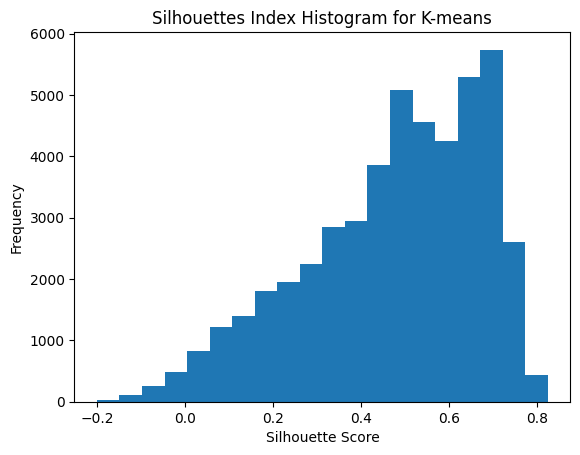

In [38]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette Score
silhouette_avg = silhouette_score(filtered_cut_points_np, labels)
print("Silhouette Score:", silhouette_avg)

# Получение значений индекса силуэта для каждой точки
silhouette_values = silhouette_samples(filtered_cut_points_np, labels)

# Построение гистограммы значений индекса силуэта
plt.hist(silhouette_values, bins=20)
plt.title('Silhouettes Index Histogram for K-means')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()


In [39]:
# Davies-Bouldin Index
davies_bouldin_value = davies_bouldin_score(filtered_cut_points_np, labels)
print("Davies-Bouldin Index:", davies_bouldin_value)

Davies-Bouldin Index: 0.6992418556888513


In [40]:
# Dunn Index
def dunn_index(X, labels):
    clusters = np.unique(labels)
    if len(clusters) == 1:
        return float('inf')
    max_intra_distance = float('-inf')
    for cluster in clusters:
        cluster_points = X[labels == cluster]
        if len(cluster_points) == 1:
            continue
        intra_distance = np.max(pdist(cluster_points))
        if intra_distance > max_intra_distance:
            max_intra_distance = intra_distance

    min_inter_distance = float('inf')
    for i, cluster1 in enumerate(clusters):
        for cluster2 in clusters[i + 1:]:
            inter_distance = np.min(cdist(X[labels == cluster1], X[labels == cluster2]))
            if inter_distance < min_inter_distance:
                min_inter_distance = inter_distance

    return min_inter_distance / max_intra_distance
dunn_value = dunn_index(filtered_cut_points_np, labels)
print("Dunn Index:", dunn_value)

Dunn Index: 0.00018828902135713523


In [41]:
# Calinski–Harabasz Index
calinski_harabasz_value = calinski_harabasz_score(filtered_cut_points_np, labels)
print("Calinski–Harabasz Index:", calinski_harabasz_value)

Calinski–Harabasz Index: 56353.83942948729


In [42]:
# C-Index
def c_index(X, labels):
    n = len(X)
    clusters = np.unique(labels)
    if len(clusters) == 1:
        return 0
    pairs = 0
    nij = 0
    for i in range(n):
        for j in range(i + 1, n):
            if labels[i] == labels[j]:
                nij += 1 if np.all(X[i] > X[j]) else 0
                pairs += 1
    return nij / pairs


c_index_value = c_index(filtered_cut_points_np, labels)
print("C-Index:", c_index_value)

C-Index: 0.2992058917855324


In [43]:
num_clusters = len(np.unique(labels))
print("Number of clusters:", num_clusters)


Number of clusters: 50


In [44]:
# Печать данных первых пяти кластеров
for cluster_idx in range(5):
    cluster_data = filtered_cut_points_np[labels == cluster_idx]
    print(f"Cluster {cluster_idx} data:")
    print(cluster_data)


Cluster 0 data:
[[-2.54  16.527  0.26 ]
 [-2.592 16.517  0.26 ]
 [-2.645 16.517  0.26 ]
 ...
 [-6.47  16.175 -1.197]
 [-6.5   16.177 -1.198]
 [-6.558 16.174 -1.199]]
Cluster 1 data:
[[  0.593 -22.38    0.966]
 [  0.661 -22.298   0.963]
 [  0.768 -23.404   1.001]
 ...
 [  3.095 -17.819  -0.916]
 [  3.148 -17.794  -0.915]
 [  3.194 -17.731  -0.912]]
Cluster 2 data:
[[-7.675 -6.95   0.124]
 [-7.77  -7.08   0.123]
 [-6.56  -6.594  0.133]
 ...
 [-4.769 -6.473 -1.151]
 [-4.724 -6.454 -1.145]
 [-4.715 -6.463 -1.145]]
Cluster 3 data:
[[49.207 16.269  1.962]
 [49.146 16.42   1.961]
 [49.532 21.461  2.034]
 ...
 [42.957 25.637 -1.1  ]
 [42.842 25.752 -1.099]
 [42.981 26.02  -1.106]]
Cluster 4 data:
[[-35.849  40.115   2.028]
 [-36.009  40.039   2.03 ]
 [-39.382  40.985   2.131]
 [-39.524  41.004   2.135]
 [-39.737  40.966   2.139]
 [-40.157  40.882   2.147]
 [-40.379  39.962   2.13 ]
 [-40.654  39.982   2.137]
 [-38.444  36.988   2.013]
 [-32.679  41.909   1.669]
 [-32.673  41.63    1.663]
 [-32

In [45]:
# import os
# import numpy as np
# from sklearn.cluster import KMeans

# # Выполнение кластеризации K-means
# num_clusters = 50  # Количество кластеров
# kmeans = KMeans(n_clusters=num_clusters, random_state=0)
# labels = kmeans.fit_predict(filtered_cut_points_np)

# # Центры кластеров
# cluster_centers = kmeans.cluster_centers_

# # Вычисление центральной точки массива
# center_point = np.mean(filtered_cut_points_np, axis=0)

# # Вычисление расстояний от каждого центра кластера до центральной точки массива
# distances_to_center = np.linalg.norm(cluster_centers - center_point, axis=1)

# # Создание директории для файла
# directory = "cluster"
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Имя файла для сохранения
# file_name = os.path.join(directory, "000000.txt")

# # Запись данных в файл
# with open(file_name, 'w') as file:
#     # Запись расстояний от каждого центра кластера до центральной точки массива
#     for distance in distances_to_center:
#         file.write(f"{distance}\n")

# print(f"Данные о расстояниях сохранены в файле {file_name}")


In [46]:
import os
import numpy as np
from sklearn.cluster import KMeans

# Выполнение кластеризации K-means
num_clusters = 50  # Количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(filtered_cut_points_np)

# Центры кластеров
cluster_centers = kmeans.cluster_centers_

# Вычисление центральной точки массива
center_point = np.mean(filtered_cut_points_np, axis=0)

# Вычисление расстояний от каждого центра кластера до центральной точки массива
distances_to_center = np.linalg.norm(cluster_centers - center_point, axis=1)

# Создание директории для файла
directory = "cluster"
if not os.path.exists(directory):
    os.makedirs(directory)

# Имя файла для сохранения
file_name = os.path.join(directory, "000000.txt")

# Запись данных в файл
with open(file_name, 'w') as file:
    for i, center in enumerate(cluster_centers):
        # Запись координат центра кластера и расстояния в одной строке
        file.write(f"{distances_to_center[i]} {center[0]} {center[1]} {center[2]}\n")

print(f"Данные о расстояниях и координатах центров кластеров сохранены в файле {file_name}")


Данные о расстояниях и координатах центров кластеров сохранены в файле cluster\000000.txt


In [47]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(filtered_cut_points_np, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.47301927


In [48]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_value = davies_bouldin_score(filtered_cut_points_np, labels)
print("Davies-Bouldin Index:", davies_bouldin_value)


Davies-Bouldin Index: 0.6992418556888513


# OURS:

In [49]:
import numpy as np

def variety_index(X, labels):
    clusters = np.unique(labels)
    diversity_per_cluster = []
    for cluster in clusters:
        cluster_points = X[labels == cluster]
        if len(cluster_points) <= 1:
            diversity_per_cluster.append(0)  # Не хватает данных для оценки разнообразия
        else:
            distances = np.linalg.norm(cluster_points[:, None] - cluster_points, axis=-1)
            diversity_per_cluster.append(np.std(distances))

    return np.mean(diversity_per_cluster)

# Вычисление "Variety Index"
variety_index_value = variety_index(filtered_cut_points_np, labels)
print("Variety Index:", variety_index_value)


Variety Index: 3.1954527
